# Computer Lab: Support Vector Machine
# SD-TSIA 211
## Davi Barreto Façanha and Thiago Azevedo Campos Costa
## 17/01/2020


##### Import:

## Observation: 
### Before running all the notebook, the breastcancerutils.py must be at the same folder of this archive. Also, because of a picture from the last question, it is important to have internet conexion as well.

In [1]:
import breastcancerutils as bcu
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import time

from PIL import Image
import requests
from io import BytesIO

# 1. Data

We can now use the function given to load the dataset.

In [2]:
# Load the dataset
X, Y = bcu.load_breastcancer("wdbcM1B0.data")

# 2. Sub-gradient Method

We have the main problem:

$$\min_{v \in \mathbb{R}^m, \ a \in \mathbb{R}, \ \xi \in \mathbb{R}^n} \frac{1}{2} \sum^m_{j=1}v_j^2 + c \sum^n_{i=1} \xi_i$$

$$\xi_i \ge 0, \forall i \in \{1, ..., n\}$$

$$\xi_i \ge 1 - y_i(x_i^Tv + a), \forall i \in \{1, ..., n\}$$

$$ c = 1$$

And the in this topic we will approach the problem with the Sub-gradient Method

## Question 2.1. 
**Show that the problem is equivalent to:**

$$\min_{v \in \mathbb{R}^m, \ a \in \mathbb{R}} \frac{1}{2} \sum^m_{j = 1}v^2_j + c \sum^n_{i = 1} \max(0, 1 - y_i(x_i^Tv + a))$$

We know that: $\xi_i \ge 0$ and $\xi \ge 1 - y_i(x_i^Tv + a)$, so as we want to minimize it, the $\xi$ value will always be its non-negative minimum, which means:

$$\min {\xi_i} = max(0, 1 - y_i(x_i^Tv + a)$$

And thus, it is correct to say that these two problems are equivalent, the minimum is the same for both.

Given that, the function in that new shape is not differentiable, but has subgradients in all its points, which means that we could try to minimize it using the Sub-gradient Method:

$$g_k \in \partial f(x_k)$$

$$x_{k+1} = x_k - \gamma_k g_k$$

Where $(\gamma_k)_{k \ge 0}$ is a sequence of steps. That way, we can assure that exists a value C > 0 such that:

$$f(\bar{x}_k^{\gamma}) - f(x^*) \ge C \frac{\sum^k_{l=0} \gamma^2_l}{\sum^k_{l=0} \gamma_l}$$

Where:

$$\bar{x}^\gamma_k = \frac{\sum^k_{l = 0} \gamma_l x_l}{\sum^k_{l=0}\gamma_j}$$

With the condition that $\lim_{k \to \infty} \frac{\sum^k_{l = 0}\gamma^2_l}{\sum^k_{l = 0}\gamma_l} = 0$, we have that $(\bar{x}^\gamma_k)$ goes to a minimizer of the function. We can use for example $\gamma_k = \frac{1}{k + 1}$.

## Question 2.2. 
**Verify graphically the subdifferential.**

We can declare a function $h : \mathbb{R} \to \mathbb{R}$ such that $h(z) = \max(0, 1 - z)$. A graphic view of this function is shown next:

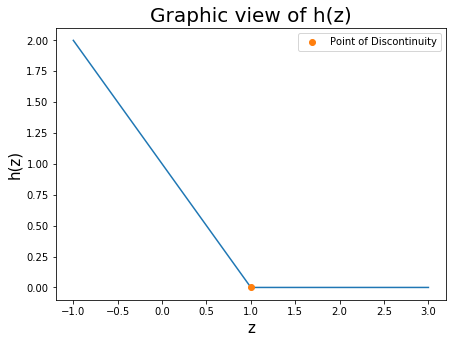

In [3]:
plt.figure(figsize=(7,5))
plt.plot(np.linspace(-1, 3, 1000), np.maximum(0, 1 - np.linspace(-1, 3, 1000)))
plt.plot(1, 0, 'o', label = 'Point of Discontinuity')
plt.xlabel('z', size = 15)
plt.ylabel('h(z)', size = 15)
plt.title("Graphic view of h(z)", size = 20)
plt.legend()
plt.show()

As we can see from the graphic above, the function we're analysing is not differentiable because of the discontinuity in the point $z = 1$, but we can separate it in three different intervals:

$z < 1$, $z = 1$, $z > 1$.

When z < 1, the function is graphically a straight differentiable line, which has a derivate equal to -1. When z > 1, we can see that the function is a constant value, which means that it has a derivate equal to 0. In z = 1, we have the Point of Discontinuity of the function and, thus, every point $\in [-1, 0]$ will be a subgradient of the function h(z), which are the derivates in both sides of the point ($1^-$ and $1^+$).

Hence, we verified graphically that:

$$\partial h(z) = \Bigg{\{} \matrix{\{-1\}, & z < 1 \\ [-1,0], & z = 1 \\ \{0\}, & z > 1}$$

## Question 2.3.
**Calculate $\partial N$ and $\partial H$:**

We can now review our objective function:

$$f(v,a) = \frac{1}{2} \sum^m_{j = 1}v^2_j + c \sum^n_{i = 1} \max(0, 1 - y_i(x_i^Tv + a))$$

We aim to show that there exists a linear application M and two separable functions N and H such that:

$$f(v,a) = N(v,a) + cH(M(v,a))$$

### $N(v,a)$:

We can than declare our function N as being a separable function as follow:

$$N(v,a) = \frac{1}{2} \sum^m_{j = 1} v^2_j = \sum^m_{j = 1} n(v_j)$$

Where $n(z) = \frac{1}{2}z^2$, $z \in   \mathbb{R}$.

The function is not dependent of $a$, so it is implicite that:

$$N(v,a) = \frac{1}{2} \sum^m_{j = 1} v^2_j + 0 \cdot a$$

And therefore, this term should be considered in the subdifferential (which will be 0).

### $H(v,a)$:

We can also declare our function H as another separable function:

$$H(M(v,a)) = \sum^n_{i = 1} h(M(v,a)_i)$$

Where the function h is the same as analysed before in the item 2.2.

### $M(v,a)$:

Now we have to find the linear application M such that its i component is equal to:

$$M(v,a)_i = y_i(x_i^Tv + a)$$

We can develop this:

$$M(v,a)_i = M * [v, a] = y_i [x_i, 1]^T [v,a] = y_i (x_{i1}v_1 + x_{i2}v_2 + ... + x_{im}v_m + a) = y_i(x_i^Tv + a)$$

With that, we can conclude:

$$M_i = y_i [x_i, 1]^T, \in \mathbb{R}^{m + 1}$$

Expanding the analysis to X and Y instead of $y_i$ and $x_i$:

$$M = \Bigg{(}\matrix{y_1x_{11} & y_1x_{12} & ... & y_1 \\ ... &  &  & ... \\ y_nx_{n1} & y_nx_{n2} & ... & y_n} \Bigg{)} = \Bigg{(} \matrix{y_1 &  &  \\  & \ddots &  \\  &  & y_n}\Bigg{)} \Bigg{(} \matrix{x_{11} & ... & 1 \\ ... & & ... \\ x_{n1} & ... & 1} \Bigg{)} = Diag(Y) [X, 1_n]$$

So we have:

$$M = Diag(Y) [X, 1_n] \in \mathbb{R}^{n x m + 1}$$

And thus the linear application:

$$M(v,a) = M [v,a]^T = \Bigg{(}\matrix{y_1x_{11} & y_1x_{12} & ... & y_1 \\ ... &  &  & ... \\ y_nx_{n1} & y_nx_{n2} & ... & y_n} \Bigg{)} \Bigg{(} \matrix{v_1 \\ ... \\ a} \Bigg{)} \in \mathbb{R}^n$$

### Subdifferential $\partial f(v,a)$:

Now that we have declared a linear application M(v,a) and the functions N(v,a) and H(M(v,a)), we can use the proposition:

$$\partial f(v,a) = \partial N(v,a) + c M^T \partial H(M(v,a))$$

Which allows us to define the subdifferential of our not differentiable objective function, which will allow us to apply the Sub-gradient Method.

### $\partial N(v,a)$:

The way we defined N(v,a), it is a separable and differentiable function:

$$N(v,a) = n(v_1) + n(v_2) + ... + n(v_m)$$ Where: $$ \ n(z) = \frac{1}{2} z^2$$

Given so:

$$\frac{dn(z)}{dz} = z$$

Also, as the function is separable, we know that:

$$\partial N(v,a) = \partial n(v_1, a) \times \partial n(v_2, a) \times ... \times \partial n(v_m, a)$$
$$\partial N(v,a) = \{v_1\} \times \{v_2\} \times ... \times \{v_m\} = \{v\}$$

### $\partial H(M(v,a))$:

We can make a similar analysis with $H(M(v,a))$, with the difference that H(M(v,a)) is a separable but not differentiable function:

$$H(M(v,a)) = h(M(v,a)_1) + h(M(v,a)_2) + ... + h(M(v,a)_n)$$

Thus:

$$\partial H(M(v,a)) = \partial h(M(v,a)_1) \times ... \times \partial h(M(v,a)_n)$$

And the subdifferential $\partial h$ was already exposed in item 2.2.

### $\partial f(v,a)$:

Given all that, we have:

$$\partial f(v,a) = \{v\} + cM^T (\partial h(M(v,a)_1) \ \times \ ... \ \times \ \partial h(M(v,a)_n))$$

## Question 2.4.

Now we can compute a function that returns the value of $f(v,a)$ and one of its subgradients in every point.

From now on, we will use X with a new column of ones, in order to apply our linear application.

In [4]:
# Inserting a column of ones into X
X_bar = np.c_[X, np.ones(len(X))]
X_bar

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461,  1.        ],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999,  1.        ],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121,  1.        ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916,  1.        ],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528,  1.        ],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  1.        ]])

Now we can write a function that uses the "diabeticRetinopath" dataset to obtain Y and X to compute the value of $f(v,a)$ and a subgradient in $\partial f(v,a)$.

In [5]:
# Compute the function and a subgradient
def fvalue_subg(va, c = 1, x = X_bar, y = Y):
    # M matrix
    M = np.dot(np.diag(y), x)
    
    v = va[:-1]
    
    # N function
    N = ((v**2)/2).sum()

    # M(v,a)
    M_va = np.dot(M, va)
    
    # h(M(v,a))
    h_M_va = np.maximum(0, 1 - M_va)
    
    # Value of f(v,a)
    fvalue = N + c * (h_M_va).sum()
    
    # Compute a subgradient of f(v,a)
    g = [] # Subgradient of H(M(v,a))
    for i in range(len(M_va)):
        if(M_va[i] < 1):
            g.append(-1)
        else:
            g.append(0)
    g = np.array(g)
    
    # Subgradient of N(v,a)
    sub_n = np.append(v, 0)
    
    fsubg = sub_n + c * np.dot(M.T, g)
    
    return(fvalue, fsubg)

## Question 2.5. 
**Compute the Sub-Gradient Method**

Now we will compute the sub-gradient method as explained earlier 2.1):

$$g_k \in \partial f(x_k)$$

$$x_{k+1} = x_k - \gamma_k g_k$$

Using:

$$\gamma_k = \frac{1}{k + 1}$$

In [6]:
%%time
# Initial point
va_j = np.zeros(len(X_bar[0]))

# Number of iterations
N = 1000

f_values = []

t_init = time.time()
for j in range(N):
    # Alphaj: 2 + j in the denominator because j initiates at 0
    alphaj = 1 / (2 + j)
    
    # Compute f and the subgradient
    t_aux = time.time()
    fj, subgj = fvalue_subg(va_j)
    t_g_i = time.time() - t_aux
    
    f_values.append(fj)
    
    # Update v,a variable
    va_j = va_j - alphaj * subgj

t_g_N = time.time() - t_init

CPU times: user 2.52 s, sys: 8 ms, total: 2.53 s
Wall time: 668 ms


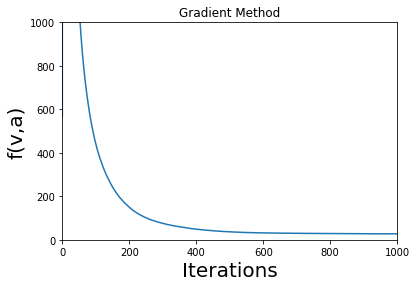

In [7]:
plt.plot(np.arange(0, N), f_values)
plt.xlim([0, N])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('Gradient Method')
plt.show()

In [27]:
print("Results for the Sub-Gradient Method:")
print("v* = ", va_j[:-1])
print("a* = ", va_j[-1])
print('f(v*, a*):', fvalue_subg(va_j)[0])

Results for the Sub-Gradient Method:
v* =  [ 0.19812031  0.10404518  0.20069072  0.22909562  0.04330657 -0.57653674
  0.76475657  0.81638642  0.03794924 -0.2854237   0.85053558 -0.31745001
  0.2559416   0.97967075  0.36196395 -0.39593291 -0.40274625  0.46882073
 -0.14435521 -0.7452868   0.68725295  1.12316373  0.45458001  0.85838556
  0.38899501 -0.25492902  0.85310166  0.23350274  0.53547037  0.69676766]
a* =  0.0
f(v*, a*): 27.643115966044803


# 3. Stochastic sub-gradient Method

$$f_{i}(v,a) = \frac{1}{2}\sum_{j=1}^{m}{v_{j}^{2}} + cn\cdot max(0, 1 - y_{i}(x_i^{T}v + a))$$

## Question 3.1
**Let I be a random variable which follows the uniform distribution on {1,. . . , n}. To show that**

$$f(v,a) = \mathbb{E}[f_{I}(v,a)]$$

Using the definition of Expectation and knowing that the probability of a Uniform Distribution is $\mathbb{P}(I) = \frac{1}{n}$, we have that:

$$\mathbb{E}[f_{I}(v,a)] = \frac{1}{2}\sum_{j=1}^{m}{v_{j}^{2}} + cn\cdot \mathbb{E}[max(0, 1 - y_{I}(x_I^{T}v + a))] =$$
$$\frac{1}{2}\sum_{j=1}^{m}{v_{j}^{2}} + cn\cdot \sum_{i=1}^{n}{max(0, 1 - y_{i}(x_i^{T}v + a))\cdot \mathbb{P}(I)} =$$
$$\frac{1}{2}\sum_{j=1}^{m}{v_{j}^{2}} + c\cdot \sum_{i=1}^{n}{max(0, 1 - y_{i}(x_i^{T}v + a))} = f(v,a)$$

## Question 3.2 
**Give the sub-differential of the function $f_{i}$.**

The first term of our function can be rewritten as $||v||_{2}^{2}$, so, surely differentiable. Than, we can call the $max()$ term as $h(v,a)$.
$$f_{i}(v,a) = \frac{1}{2}\sum_{j=1}^{m}{v_{j}^{2}} + cn\cdot max(0, 1 - y_{i}(x_i^{T}v + a))$$

$$f_{i}(v,a) = \frac{1}{2}\sum_{j=1}^{m}{v_{j}^{2}} + cn\cdot h(v)$$

Than, we can divide our funtion into two subfunction and calculate the subgradient for each case.

#### 1. $F(v,a) = \frac{1}{2}\sum_{j=1}^{n}{v_j^{2}} + a\cdot 0$

$$ \partial F(v,a) = \partial F(v_1) \times \cdot \cdot \cdot \times \partial F(v_m) \times \partial F(a)$$

Where, 

$$\partial F(v) = \{v\} $$

$$\partial F(a) = \{0\}$$


#### 2. $G(v,a) = cn\cdot h(v,a)$

$$ \partial G(v,a) = \partial G(v_I) \times \partial G(a)$$

Where, 

$$\partial G(v) = -cny_{i}x_i^{T}, \; for \quad y_{i}(x_i^{T}v + a) < 1 $$

$$\partial G(a) = -cny_{i}, \; for \quad y_{i}(x_i^{T}v + a) < 1 $$

$$\partial G(v) = \partial G(a) = 0, \; for \quad y_{i}(x_i^{T}v + a) > 1 $$

Finally,

$$\partial f_{i}(v,a) = \partial F(v,a) + \partial G(v,a)$$

With $\partial f_{i}(v,a) \in \mathbb{R}^{m+1}$ 

## Question 3.3

In [9]:
def sous_grad_stoc(va, gamma, c = 1, x = X_bar, y = Y):
    # Number of samples
    N = len(y)
    
    # Random Index I in [1...N]
    I = rd.randint(0, len(y)-1)
    
    # Is the value from the max(0, 1 - aux) function
    aux = y[I]*np.dot(np.transpose(x[I]), va)
    
    if aux >= 1:
        s_grad = va
        s_grad[-1] = 0
        
    if aux < 1:
        s_grad = va
        s_grad[-1] = 0
        s_grad = s_grad - c*N*y[I]*np.transpose(x[I])
   
    return (va - gamma*s_grad)

In [10]:
def f(va, c=1, x = X_bar, y = Y):
    # M matrix
    M = np.dot(np.diag(y), x)
    
    v = va[:-1]
    
    # N function
    N = sum((v**2)/2)

    # M(v,a)
    M_va = np.dot(M, va)
    
    # h(M(v,a))
    h_M_va = np.maximum(0, 1 - M_va)
    
    # Value of f(v,a)
    fvalue = N + c * (h_M_va).sum()

    return fvalue

In [11]:
%%time
# Initial point
va_j = np.zeros(len(X_bar[0]))

# Number of iterations
N_2 = 100000

N1 = 1000
N2 = 3000
N3 = N_2

fsub_values = []

t_init = time.time()
for j in range(N_2):
    # Gamma: j + 2 in the denominator because j initiates at 0
    gamma = 1/(j + 2)
    
    # Compute the stochastic subgradient
    t_aux = time.time()
    va_j = sous_grad_stoc(va_j, gamma)
    t_sg_i = time.time() - t_aux 
    
    if(j == N1):
        t_sg_N1 = time.time() - t_init
    
    if(j == N2):
        t_sg_N2 = time.time() - t_init
        
    fsub_values.append(f(va_j))

t_sg_N3 = time.time() - t_init

CPU times: user 2min 40s, sys: 732 ms, total: 2min 41s
Wall time: 43 s


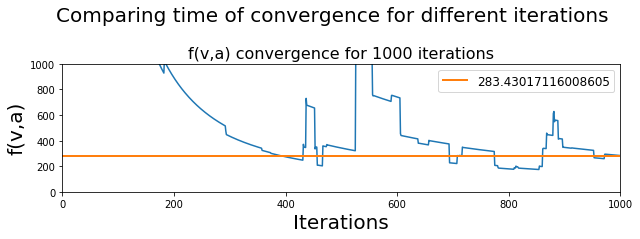

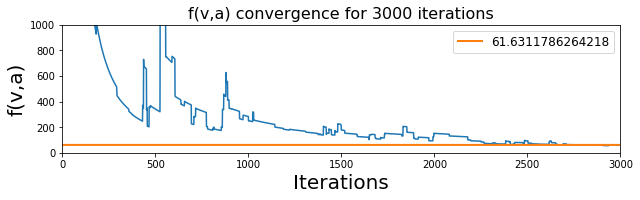

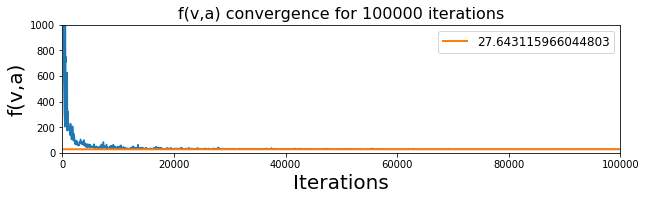

In [12]:
plt.figure(figsize=(10, 8))

plt.suptitle('Comparing time of convergence for different iterations', size=20)

plt.subplot(311)
plt.plot(np.arange(0, N1), fsub_values[:N1])
plt.plot(np.arange(0, N1), fsub_values[N1]*np.ones(N1),linewidth=2, label = str(fsub_values[N1]))
plt.xlim([0, N1])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('f(v,a) convergence for '+str(N1)+' iterations', size=16)
plt.legend(fontsize=12)


plt.figure(figsize=(10, 8))
plt.subplot(312)
plt.plot(np.arange(0, N2), fsub_values[:N2])
plt.plot(np.arange(0, N2), fsub_values[N2]*np.ones(N2),linewidth=2, label = str(fsub_values[N2]))
plt.xlim([0, N2])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('f(v,a) convergence for '+str(N2)+' iterations', size=16)
plt.legend(fontsize=12)


plt.figure(figsize=(10, 8))
plt.subplot(313)
plt.plot(np.arange(0, N3), fsub_values[:N3])
plt.plot(np.arange(0, N3), fsub_values[-1]*np.ones(N3),linewidth=2, label = str(fsub_values[-1]))
plt.xlim([0, N3])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('f(v,a) convergence for '+str(N3)+' iterations', size=16)
plt.legend(fontsize=12)

plt.show()

# 4. Augmented Lagrangian Method

## Question 4.1.
**Lagrangian.**

We will now begin a new approach of the problem, dealing with the Augmented Lagrangian Method. First, we recall the Lagrangian of the original problem. 

Dealing with a custom minimization problem:

$$\min_{x \in \mathbb{R}} f(x) + ι_{g \le 0}(x) + ι_{A = 0}(x)$$

The Lagrangian function associated to the problem is then:

$$\mathcal{L}(x, \phi_E, \phi_I) = f(x) + \langle \phi_E, A(x) \rangle + \langle \phi_I, g(x) \rangle - ι_{\mathbb{R}^p_+}(\phi_I)$$

That way, we can call the Lagrangian function of our main problem:

$$\mathcal{L}(v, a, \xi, \phi, \psi) = \frac{1}{2} \sum^m_{j = 1} v^2_j + c \sum^n_{i = 1} \xi_i - \sum^n_{i = 1}\phi_i \xi_i - \sum^n_{i = 1} (\psi_i(y_i(x_i^Tv + a) + \xi_i - 1) - ι_{\mathbb{R}^n_+}(\phi) - ι_{\mathbb{R}^n_+}(\psi)$$

## Question 4.2.
**Derivatives.**

For $\rho > 0$, we define $g: \mathbb{R}^2 \to \mathbb{R}$ such as:

$$g(x, \phi) = -\frac{1}{2 \rho} \phi^2 + \frac{\rho}{2} \bigg{(}max \bigg{(}0, x + \frac{\phi}{\rho}\bigg{)}\bigg{)}^2$$

To calculate the derivatives in respect to $x$ or $\phi$, we will use that:

$$\nabla_x \max(0, f(x)) = \max(0, \nabla_x f(x))$$

Now, showing the derivative of g in respect to $x$:

$$\nabla_x g(x, \phi) = \frac{\rho}{2} 2 \max(0, x + \frac{\phi}{\rho}) \cdot \max (0, \nabla_x (x + \frac{\phi}{\rho})) = \rho (\max(0, x + \frac{\phi}{\rho})) \cdot \max(0,1)$$

$$\nabla_x g(x, \phi) = \rho (\max(0, x + \frac{\phi}{\rho}))$$

And the derivative of g in respect to $\phi$:

$$\nabla_{\phi} g(x, \phi) = - \frac{2}{2 \rho} \phi + \frac{\rho}{2} 2 (\max (0, x + \frac{\phi}{\rho})) \cdot \max (0, \nabla_{\phi} (x + \frac{\phi}{\rho})) = - \frac{\phi}{\rho} + \rho (\max(0, x + \frac{\phi}{\rho})) \cdot \max(0, \frac{1}{\rho})$$

$$\nabla_{\phi} g(x, \phi) = -\frac{\phi}{\rho} + \max(0, x + \frac{\phi}{\rho})$$

$$\nabla_{\phi} g(x, \phi) = \max ( -\frac{\phi}{\rho}, x)$$

## Question 4.3. 
**Convexity.**

Now if we consider a function $(x \to g(x, \phi))$, which means the function g defined earlier but with respect only to x, we can compute the second derivative in respect to x:

$$\nabla^2_x g(x, \phi) = \rho \nabla_x (\max(0, x + \frac{\phi}{\rho})) = \rho \max(0, 1)$$

$$\nabla^2_x g(x, \phi) = \rho$$

And by definition, $\rho > 0$, which means that this function $(x \to g(x, \phi))$ is a convex function for all $\phi$.

Now we consider another function $(\phi \to g(x, \phi))$ and we want to show that this function is concave, which means that $(\phi \to -g(x, \phi))$ is convex. To show that, we have (similarly to what we've done in respect to x):

$$\nabla_\phi(-g(x , \phi)) = \frac{\phi}{\rho} - \max(0, x + \frac{\phi}{\rho})$$

$$\nabla^2_\phi(-g(x, \phi)) = \frac{1}{\rho} - \max(0, \frac{1}{\rho}) = 0$$

That said, the second derivative is non-negative and, thus, $\phi \to -g(x, \phi)$ is convex for any x. Hence, $\phi \to g(x, \phi)$ is concave for any x.

## Question 4.4. 
**Augmented Lagrangian.**

Aiming to the final goal of using the Augmented Lagrangian Method, we will now call the Augmented Lagrangian of the main problem:

$$\mathcal{L}_\rho (v, a, \xi, \phi, \psi) = \frac{1}{2}||v||^2_2 + c \sum^n_{i = 1} \xi_i + \sum^n_{i = 1} g(- \xi_i, \phi_i) + \sum^n_{i = 1} g(- \xi_i + 1 - y_i(x_i^Tv + a), \psi_i)$$

And $g(x, \phi)$ is the same function exposed earlier.

Given that, we can write a function that resolves the minimization problem:

$$(v^*, a^*, \xi^*) \in \arg \min_{v, a, \xi} \mathcal{L}_\rho(v, a, \xi, \phi, \psi)$$

Using the Gradient Method and using the stop condition:

$$||\nabla_{(a,v,\xi)} \mathcal{L}_\rho(v,a,\xi,\phi_k, \psi_k)|| \le \epsilon$$

With $\epsilon = 1$, $\rho = 2$, and $\phi_0$ and $\psi_0$ given.

The iterations will be:

$$v_{k+1} = v_k - \gamma_k \nabla_v \mathcal{L}_\rho(v, a_k, \xi_k, \phi, \psi)$$

$$a_{k+1} = a_k - \gamma_k \nabla_a \mathcal{L}_\rho(v_k, a, \xi_k, \phi, \psi)$$

$$\xi_{k+1} = \xi_k - \gamma_k \nabla_\xi \mathcal{L}_\rho(v_k, a_k, \xi, \phi, \psi)$$

### For $\nabla_v \mathcal{L}_{\rho}(v, a_k, \xi_k, \phi_k, \psi_k)$:

$$\nabla_v \mathcal{L}_{\rho}(v, a_k, \xi_k, \phi_k, \psi_k) = \nabla_v (\frac{1}{2}||v||^2_2) + \nabla_v (\sum^n_{i = 1} g(- \xi_{ki} + 1 - y_i(x_i^Tv + a_k), \psi_{ki}))) = v + \sum^n_{i = 1} \nabla_v g(- \xi_{ki} + 1 - y_i(x_i^Tv + a_k), \psi_{ki}))$$

We can use the derivative we've found in 4.2.

$$\nabla_x g(x, \phi) = \rho (\max(0, x + \frac{\phi}{\rho}))$$

Applying in our problem:

$$\nabla_v \mathcal{L}_{\rho}(v, a_k, \xi_k, \phi_k, \psi_k) = v + \sum^n_{i = 1} \rho \cdot \max \bigg{(}0, - \xi_{ki} + 1 - y_i(x_i^Tv + a_k) + \frac{\psi_{ki}}{\rho} \bigg{)} \nabla_v (- \xi_{ki} + 1 - y_i(x_i^Tv + a_k))$$

$$= v + \sum^n_{i = 1} \rho \cdot \max \bigg{(}0, - \xi_{ki} + 1 - y_i(x_i^Tv + a_k) + \frac{\psi_{ki}}{\rho} \bigg{)} (-y_ix_i^T)$$

### For $\nabla_a \mathcal{L}_{\rho}(v, a_k, \xi_k, \phi_k, \psi_k)$:

$$\nabla_a \mathcal{L}_{\rho}(v, a_k, \xi_k, \phi_k, \psi_k) = \sum^n_{i = 1} \nabla_a g(- \xi_{ki} + 1 - y_i(x_i^Tv + a_k), \psi_{ki}) = \sum^n_{i = 1}\rho \max \bigg{(}0, - \xi_{ki} + 1 - y_i(x_i^Tv + a_k) + \frac{\psi_{ki}}{\rho} \bigg{)} (-y_i)$$

### For $\nabla_{\xi} \mathcal{L}_\rho(v_k, a_k, \xi, \phi_k, \psi_k)$:

Doing the derivative in respect to only $\xi_i$:

$$\nabla_{\xi_i} \mathcal{L}_\rho(v_k, a_k, \xi, \phi_k, \psi_k) = c + \nabla_{\xi_i} g(-\xi_i, \phi_{ki}) + \nabla_{\xi_i} g(- \xi_{ki} + 1 - y_i(x_i^Tv + a_k), \psi_{ki})$$

$$ = c - \rho \max \bigg{(}0, -\xi_i + \frac{\phi_{ki}}{\rho} \bigg{)} - \rho \max \bigg{(} 0, -\xi_i + 1 - y_i(x_i^Tv + a) + \frac{\psi_{ki}}{\rho} \bigg{)}$$

And so the derivative in respect to $\xi$:

$$\nabla_{\xi} \mathcal{L}_\rho(v_k, a_k, \xi, \phi_k, \psi_k) = c \cdot 1_n - \rho \cdot \max(0, - \xi + \frac{\phi_k}{\rho}) - \rho \max \bigg{(} 0, -\xi + 1_n - Diag(Y)(Xv + a \cdot 1_n) + \frac{\psi}{\rho} \bigg{)}$$

And now we can write our code to compute the $(v^*, a^*, \xi^*)$ as exposed before.

In [13]:
def grad_v_a_xi(v, a, xi, phi, psi, rho, x = X, y = Y):
    # Keep the gradient values
    grad_v = 0
    grad_a = 0
    grad_xi = []
    
    for i in range(len(y)):
        # Compute the gradients with respect to v, a and xi
        grad_v += rho * np.maximum(0, (-xi[i] + 1 - y[i] * (np.dot(x[i], v) + a) + psi[i]/rho)) * (-y[i]) * x[i]
        grad_a += rho * np.maximum(0, (-xi[i] + 1 - y[i] * (np.dot(x[i], v) + a) + psi[i]/rho)) * (-y[i])
        grad_xi.append(1 - rho * np.maximum(0, - xi[i] + phi[i]/rho) - rho * np.maximum(0, - xi[i] + 1 - y[i] * (np.dot(x[i], v) + a) + psi[i]/rho))
        
    grad_v = grad_v + v
    grad_xi = np.array(grad_xi)

    return(grad_v, grad_a, grad_xi)

In [14]:
def v_a_xi_minimization(v, a, xi, phi, psi, rho = 2, epsilon = 1, x = X, y = Y):
    counter = 1
    while(1):
        # The step of the Gradient Method
        alphak = 1/800
        
        # Gets the gradients
        nabla_v, nabla_a, nabla_xi = grad_v_a_xi(v, a, xi, phi, psi, rho)
        
        # Update the values of v, a and xi
        v = v - alphak * nabla_v
        a = a - alphak * nabla_a
        xi = xi - alphak * nabla_xi
        
        counter += 1
        
        # Stops when the Frobenius Norm of the gradients is smaller than epsilon
        aux = np.sqrt((nabla_v**2).sum() + (nabla_a)**2 + (nabla_xi**2).sum())
        if(aux <= epsilon):
            return(v, a, xi)

In [15]:
# Initial conditions to the variables
phi0 = np.zeros(len(Y))
psi0 = np.zeros(len(Y))

v0 = np.zeros(len(X[0]))
a0 = 0
xi0 = np.zeros(len(Y))

v_, a_, xi_ = v_a_xi_minimization(v0, a0, xi0, phi0, psi0)

In [16]:
print("v*: ", v_)
print("\na*: ", a_)
print("\nxi*: ", xi_)

v*:  [ 0.07878975  0.07938043  0.08066522  0.15568689  0.05106809 -0.6615462
  0.69677768  0.91747173 -0.04627373 -0.17931177  0.88509497 -0.29801859
  0.29284812  0.9261717   0.28613319 -0.2649181  -0.33126511  0.46699093
 -0.19109688 -0.7614896   0.76367999  1.0550468   0.56017599  0.91888717
  0.37239097 -0.21623222  0.77519852  0.31273241  0.58871778  0.61572334]

a*:  0.025230136573031928

xi*:  [-0.48897861 -0.48897861 -0.48897861 -0.48897861 -0.48897861 -0.48897861
 -0.48897861 -0.48897861 -0.48897861 -0.48897861 -0.48884778 -0.48897861
 -0.48897861 -0.0200956  -0.48897861 -0.48897861 -0.48897861 -0.48897861
 -0.48897861 -0.45051819 -0.48897861 -0.48897861 -0.48897861 -0.48897861
 -0.48897861 -0.48897861 -0.48897861 -0.48897861 -0.48897861 -0.48897861
 -0.48897861 -0.48897861 -0.48897861 -0.48897861 -0.48897861 -0.48897861
 -0.48897861 -0.48897861 -0.39672903 -0.45118648  1.64915776 -0.40094902
 -0.48897861 -0.48897861 -0.48892807 -0.48897861 -0.48897861 -0.48897861
 -0.48897861

## Question 4.5
**Code one function which calculates $\nabla_{(\phi, \psi)}L_{p}(v_{k+1}, a_{k+1}, \xi_{k+1}, \phi_k, \psi_k)$:**

Knowing the Lagragian,
$$\nabla_{(\phi, \psi)}\mathcal{L}_\rho (v, a, \xi, \phi, \psi) = \frac{1}{2}||v||^2_2 + c \sum^n_{i = 1} \xi_i + \sum^n_{i = 1} g(- \xi_i, \phi_i) + \sum^n_{i = 1} g(- \xi_i + 1 - y_i(x_i^Tv + a), \psi_i)$$

and the $\nabla_{\phi \; i} g(x, \phi)$ for any $x, \phi \in \mathbb{R}$ ,

$$\nabla_{\phi \; i} g(x, \phi) = \max ( -\frac{\phi_{i}}{\rho}, x_i)$$

We can easily find the new gradient:

$$\nabla_{\phi \; i}L_{p}(v_{k+1}, a_{k+1}, \xi_{k+1}, \phi_k, \psi_k) = max(-\frac{\phi_i}{\rho}, -\xi_i)$$

$$\nabla_{\psi \; i}L_{p}(v_{k+1}, a_{k+1}, \xi_{k+1}, \phi_k, \psi_k) = max(-\frac{\psi_i}{\rho}, -\xi_i + 1 -y_i(x_i^{T}v + a))$$

In [17]:
def grad_phi_psi(v, a, xi, phi, psi, rho = 2, x = X, y = Y):
    # Keep the gradients in respect to phi and psi
    grad_phi = []
    grad_psi = []
    
    for i in range(len(psi)):
        # Compute the gradients in respect to phi and psi
        grad_phi.append(np.maximum(-phi[i]/rho, -xi[i]))
        grad_psi.append(np.maximum(-psi[i]/rho, -xi[i] + 1 - y[i] * (np.dot(x[i], v) + a)))
        
    grad_phi = np.array(grad_phi)
    grad_psi = np.array(grad_psi)
        
    return(grad_phi, grad_psi)

## Question 4.6
**Code the augmented Lagrangian method and launch it for the initial condition $(\psi_0, \psi_0) = 0$ for 2000 iterations.**

In [18]:
# Initial conditions to the iteration variables
phi_k = np.zeros(len(Y))
psi_k = np.zeros(len(Y))

v_k = np.zeros(len(X[0]))
a_k = 0
xi_k = np.zeros(len(Y))

In [19]:
%%time
# Number of iterations
N_3 = 2000

# Keeps the values of f
f_values_aug = []
gammak = 1/800 # Step
rho_ = 2

t_init = time.time()
for k in range(N_3):
    t_aux = time.time()
    
    # Minimize for v, a and xi
    v_k, a_k, xi_k = v_a_xi_minimization(v_k, a_k, xi_k, phi_k, psi_k, rho = rho_)
    
    # Gets the gradient of the augmented lagrangian with respect to phi and psi
    nabla_phi, nabla_psi = grad_phi_psi(v_k, a_k, xi_k, phi_k, psi_k, rho = rho_)
    
    # Update the values of phi and psi
    phi_k = phi_k + rho_ * nabla_phi
    psi_k = psi_k + rho_ * nabla_psi
    
    t_aug_i = time.time() - t_aux
    
    va_k = np.append(v_k, a_k)
    f_values_aug.append(f(va_k))
    
t_aug = time.time() - t_init

CPU times: user 2min 54s, sys: 868 ms, total: 2min 55s
Wall time: 1min 10s


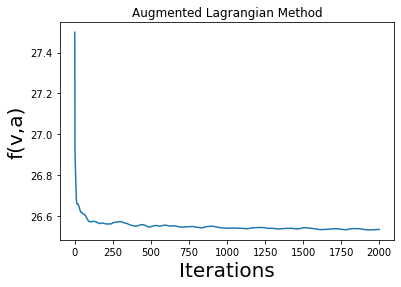

In [20]:
plt.plot(np.arange(0, N_3), f_values_aug)
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title("Augmented Lagrangian Method")
plt.show()

# 5. Comparison

## Question 5.1
**Compare the three algorithms**

## 1. Gradient Method x Stochastic Gradient Method

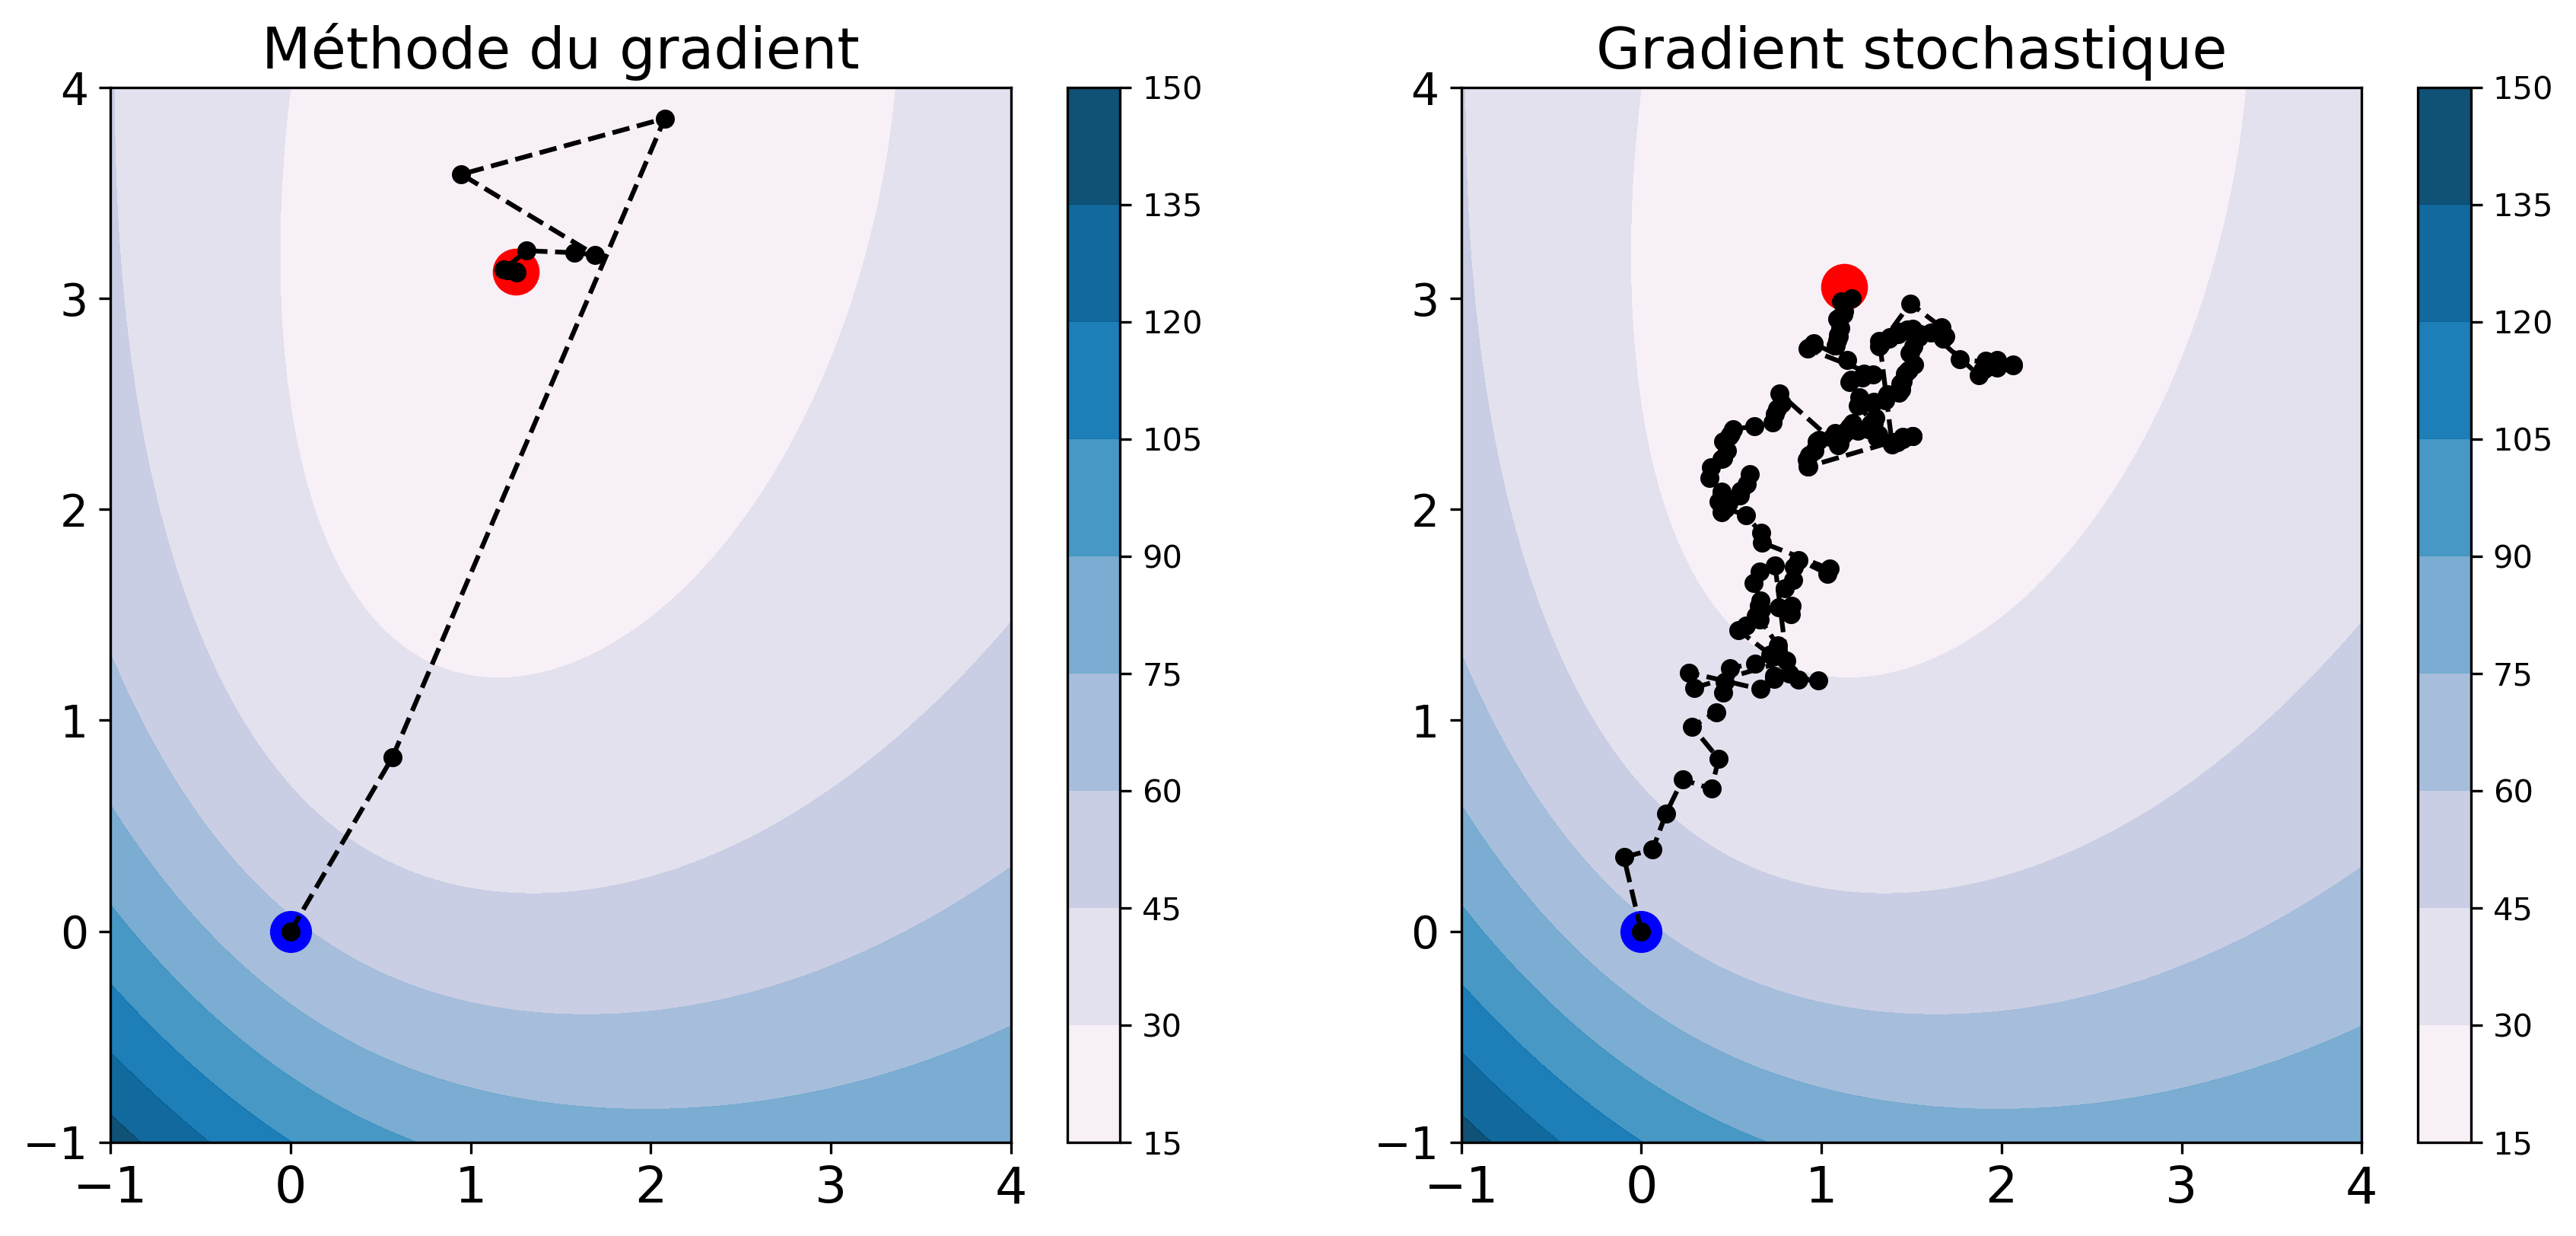

In [21]:
response = requests.get('https://user.oc-static.com/upload/2019/08/08/15652994765729_gd_vs_sgd.png')
img = Image.open(BytesIO(response.content))
img

The idea behind the **Stochastic Gradient Method** is to use the **Gradient Method** to minize the Expectation of the fuction instead of its 'empirical value'. 
    
Therefore, we define a random variable $I$ which follows a uniform law over $\{1, ... , n\}$. Than, our new minimization problem is over $\mathbb{E}[f_{I}(v,a)]$. Ergo, at each iteration, we gonna pick a index $I_i$ with $\mathbb{P}(I = i) = \frac{1}{N}$.

Because of that random factor, usually it is necessary more iterarions to get at the same optimal point of the normal Gradient Method. On the other hand, if we analyse just one iteration of both methods, the Stochastic one has a lower comptutational complexity.

<Figure size 432x288 with 0 Axes>

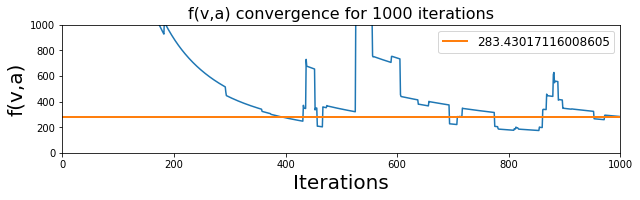

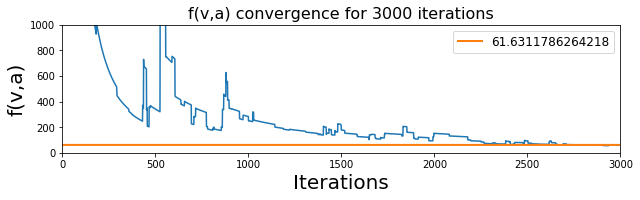

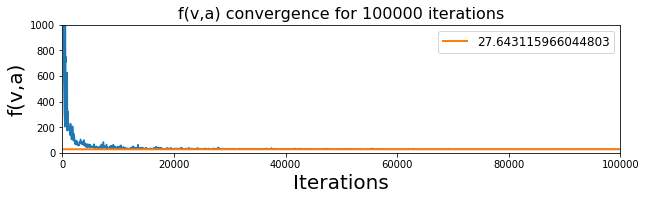

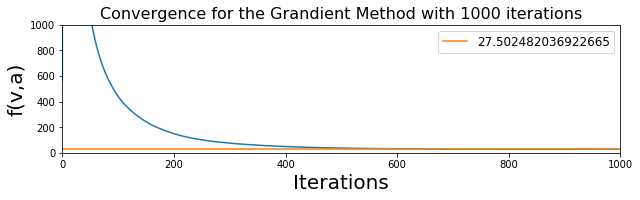

In [22]:
plt.suptitle('Comparing time of convergence for different methods', size=20)

plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.plot(np.arange(0, N1), fsub_values[:N1])
plt.plot(np.arange(0, N1), fsub_values[N1]*np.ones(N1),linewidth=2, label = str(fsub_values[N1]))
plt.xlim([0, N1])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('f(v,a) convergence for '+str(N1)+' iterations', size=16)
plt.legend(fontsize=12)


plt.figure(figsize=(10, 8))
plt.subplot(312)
plt.plot(np.arange(0, N2), fsub_values[:N2])
plt.plot(np.arange(0, N2), fsub_values[N2]*np.ones(N2),linewidth=2, label = str(fsub_values[N2]))
plt.xlim([0, N2])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('f(v,a) convergence for '+str(N2)+' iterations', size=16)
plt.legend(fontsize=12)


plt.figure(figsize=(10, 8))
plt.subplot(313)
plt.plot(np.arange(0, N3), fsub_values[:N3])
plt.plot(np.arange(0, N3), fsub_values[-1]*np.ones(N3),linewidth=2, label = str(fsub_values[-1]))
plt.xlim([0, N3])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('f(v,a) convergence for '+str(N3)+' iterations', size=16)
plt.legend(fontsize=12)


plt.figure(figsize=(10, 8))
plt.subplot(313)
plt.plot(np.arange(0, N), f_values)
plt.plot(np.arange(0, N), f_values[-1]*np.ones(N), label = str(f_values[-1]))
plt.xlim([0, N])
plt.ylim([0, 1000])
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title('Convergence for the Grandient Method with 1000 iterations', size=16)
plt.legend(fontsize=12)

plt.show()

In [23]:
print('1 iteration of the Gradient Method: ', t_g_i, 'secs')
print('1 iteration of the Stochastic Gradient Method: ', t_sg_i, 'secs')
print(str(N)+' iteration of the Gradient Method: ', t_g_N, 'secs')
print(str(N1)+' iteration of the Stochastic Gradient Method: ', t_sg_N1, 'secs')
print(str(N2)+' iteration of the Stochastic Gradient Method: ', t_sg_N2, 'secs')
print(str(N3)+' iteration of the Stochastic Gradient Method: ', t_sg_N3, 'secs')

1 iteration of the Gradient Method:  0.0005853176116943359 secs
1 iteration of the Stochastic Gradient Method:  1.0728836059570312e-05 secs
1000 iteration of the Gradient Method:  0.6684558391571045 secs
1000 iteration of the Stochastic Gradient Method:  0.36557531356811523 secs
3000 iteration of the Stochastic Gradient Method:  1.4769964218139648 secs
100000 iteration of the Stochastic Gradient Method:  42.9831964969635 secs


So, checking the time for each method at different situations, we confirm that indeed is easier to compute 1 interation of the Stochastic Method than the Gradient Method. However, the quantity of iterations needed for achieving a value close to the the Gradient Method makes it too costly. 

We can conclude that when speaking of these two methods, for our case, the Gradient Method is more accurate. But in other cases, where the accurancy we want at the end has not to be so high or if the function is a better one, the Stochastic can surely be a good option.  

### 2. Gradient Method x Descent Gradient Method x Increased Lagrangian Method

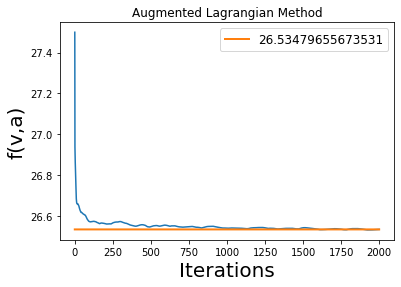

In [24]:
plt.plot(np.arange(0, N_3), f_values_aug)
plt.plot(np.arange(0, N_3), np.ones(N_3)*f_values_aug[-1], linewidth=2, label = str(f_values_aug[-1]))
plt.xlabel('Iterations', size = 20)
plt.ylabel('f(v,a)', size = 20)
plt.title("Augmented Lagrangian Method")
plt.legend(fontsize=12)
plt.show()

In [25]:
print('1 iteration of the Stochastic Gradient Method: ', t_aug_i, 'secs')
print(str(N_3)+' iteration of the Gradient Method: ', t_aug, 'secs')

1 iteration of the Stochastic Gradient Method:  0.013983726501464844 secs
2000 iteration of the Gradient Method:  70.1100447177887 secs


Finally, the **Increased Lagrangian Method** achieves the best and minimum value of $f(v,a)$. However, for just 2000 iterations, it is the most time consuming method for a value not too much better than the other two, which are a lot more faster for solving our problem.